In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

from glob import glob

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
IMAGE_SIZE = [224,224]

train_path = 'C:\\Users\\User\\Desktop\\Datasets\\Intel image classification\\seg_train'
val_path = 'C:\\Users\\User\\Desktop\\Datasets\\Intel image classification\\seg_test'

In [3]:
vgg16 = VGG16(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
for layer in vgg16.layers:
    layer.trainable = False

In [5]:
folders = glob('C:\\Users\\User\\Desktop\\Datasets\\Intel image classification\\seg_train\\*')

In [6]:
folders

['C:\\Users\\User\\Desktop\\Datasets\\Intel image classification\\seg_train\\buildings',
 'C:\\Users\\User\\Desktop\\Datasets\\Intel image classification\\seg_train\\forest',
 'C:\\Users\\User\\Desktop\\Datasets\\Intel image classification\\seg_train\\glacier',
 'C:\\Users\\User\\Desktop\\Datasets\\Intel image classification\\seg_train\\mountain',
 'C:\\Users\\User\\Desktop\\Datasets\\Intel image classification\\seg_train\\sea',
 'C:\\Users\\User\\Desktop\\Datasets\\Intel image classification\\seg_train\\street']

In [7]:
x = Flatten()(vgg16.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

In [9]:
model = Model(inputs=vgg16.input, outputs=prediction)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory('C:\\Users\\User\\Desktop\\Datasets\\Intel image classification\\seg_train',
                                                 target_size = (224,224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 14034 images belonging to 6 classes.


In [14]:
test_set = test_datagen.flow_from_directory('C:\\Users\\User\\Desktop\\Datasets\\Intel image classification\\seg_test',
                                            target_size = (224,224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 3000 images belonging to 6 classes.


In [15]:
r = model.fit(training_set,
              validation_data = test_set,
              epochs = 2,
              steps_per_epoch = len(training_set),
              validation_steps = len(test_set))            

Epoch 1/2


878/878 [==============================] - 3685s 4s/step - loss: 0.5735 - accuracy: 0.8159 - val_loss: 0.5496 - val_accuracy: 0.8377
Epoch 2/2
878/878 [==============================] - 3606s 4s/step - loss: 0.4718 - accuracy: 0.8616 - val_loss: 0.5446 - val_accuracy: 0.8610


In [23]:
test = tf.keras.preprocessing.image.load_img('C:\\Users\\User\\Desktop\\Datasets\\Intel image classification\\seg_pred\\73.jpg', target_size=(224,224))

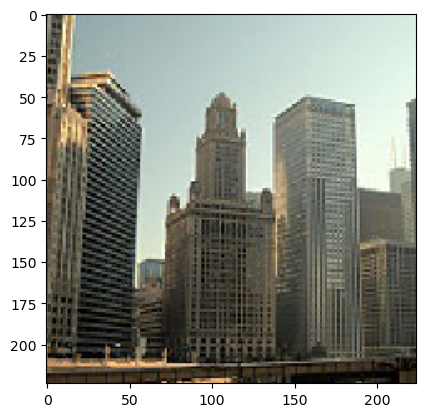

In [24]:
plt.imshow(test)

In [18]:
class_dict = training_set.class_indices
class_dict

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [19]:
class_name = []

for key,value in class_dict.items():
    class_name.append(key)

In [20]:
class_name

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [25]:
class_name[np.argmax(model.predict(tf.expand_dims(test, axis=0))[0])]

1/1 [==============================] - 0s 242ms/step


'buildings'